In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# #1

In [3]:
# Import exam_results.dta and produce some summary statistics.
df = pd.read_stata('exam_results.dta')
df.describe()
df


,age,test_score,hours_studied,pass,distinction,fail
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,24.436001,58.130001,48.506001,0.714000,0.118000,0.168000
std,5.099600,10.439495,3.273438,0.452342,0.322931,0.374241
min,17.000000,36.000000,38.000000,0.000000,0.000000,0.000000
25%,21.000000,51.000000,46.000000,0.000000,0.000000,0.000000
50%,24.000000,56.000000,49.000000,1.000000,0.000000,0.000000
75%,25.000000,62.000000,51.000000,1.000000,0.000000,0.000000
max,56.000000,89.000000,56.000000,1.000000,1.000000,1.000000


#### Age Range:
The wide age range of students (17 to 56) might be surprising. Typically, students in the last year of their master's degree are expected to be within a narrower age range. Exploring the reasons behind such a diverse age range could provide interesting insights.

#### Test Score Distribution:
The standard deviation of the test scores is relatively high (10.44). This suggests a considerable variability in the test scores among students. Investigating the factors contributing to this variability could be insightful.

#### Hours Studied vs. Distinction:
The percentage of students achieving a distinction is relatively low (11.8%). It might be surprising if students are investing a significant amount of time studying (average hours_studied is 48.51), yet only a small proportion achieve a distinction. This raises questions about the effectiveness of studying methods or other factors influencing exam performance.

#### Minimum Hours Studied:
The minimum hours studied is 38, which is not significantly lower than the mean. It could be surprising if students who studied fewer hours still performed well, suggesting that factors other than study hours contribute to success.

In [4]:
# Display the first 5 rows of the data
df.head()

,name,age,test_score,hours_studied,most_lectures,pass,distinction,fail
0,Maryam Burton,52.0,36.0,48.0,Yes,0.0,0.0,1.0
1,Benjamin Rowe,23.0,79.0,47.0,Yes,0.0,1.0,0.0
2,Yael Bernard,37.0,81.0,49.0,Yes,0.0,1.0,0.0
3,Ciaran Montgomery,23.0,61.0,48.0,No,1.0,0.0,0.0
4,Damian Sherman,23.0,51.0,56.0,No,1.0,0.0,0.0


# #2

-0.11211888153155519

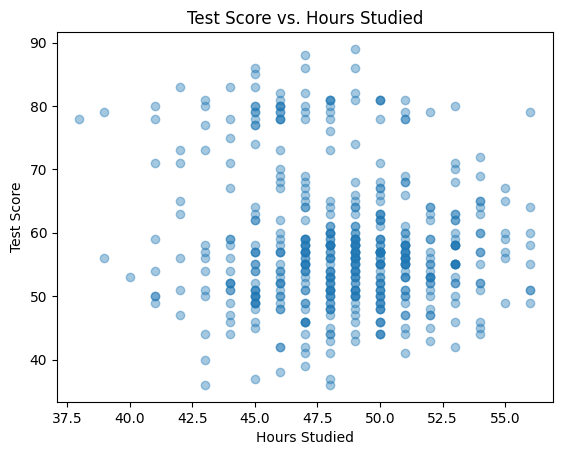

In [5]:
# Scatter plot of the test score and hours studied
plt.scatter(df['hours_studied'], df['test_score'], alpha=0.4)
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.title('Test Score vs. Hours Studied')

# Calculate the correlation coefficient between the test score and hours studied
df['hours_studied'].corr(df['test_score'])

# #3

In [6]:
# Estimate an OLS regression where test score is the dependent variable, and independent variable is hours studied: 𝑡𝑒𝑠𝑡 𝑠𝑐𝑜𝑟𝑒 = 𝛽0 + 𝛽1ℎ𝑜𝑢𝑟𝑠 𝑠𝑡𝑢𝑑𝑖𝑒𝑑 + 𝑢𝑖
# Add a constant to the independent variable
X = sm.add_constant(df['hours_studied'])

# Create a model for OLS
model = sm.OLS(df['test_score'], X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.340
Date:                Mon, 13 Nov 2023   Prob (F-statistic):             0.0121
Time:                        22:19:44   Log-Likelihood:                -1878.6
No. Observations:                 500   AIC:                             3761.
Df Residuals:                     498   BIC:                             3770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            75.4740      6.904     10.932

# #4

**Question:** State the null hypothesis that you want to test to answer our research question. Test the
hypothesis using 1%, 5% and 10% significance levels, and interpret the results.

Text here...

# #5

Text(0.5, 1.0, 'Residuals Test Score vs. Hours Studied')

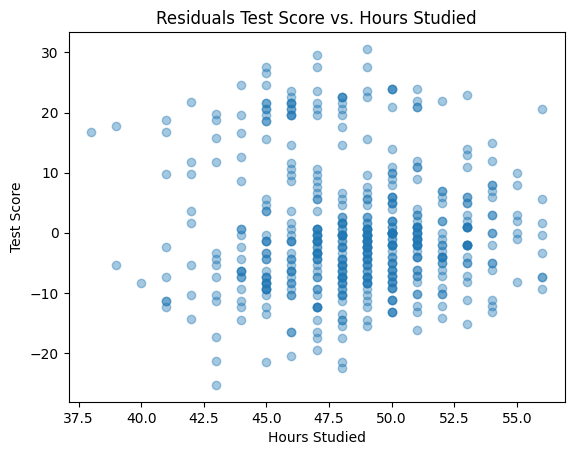

In [12]:
# Plot the residuals of Model 1 against educ.
plt.scatter(df['hours_studied'], model.resid, alpha=0.4)
plt.xlabel('Hours Studied')
plt.ylabel('Test Score')
plt.title('Residuals Test Score vs. Hours Studied')

# #6

In [11]:
# Define values for categorical variables
heavy_int = int(56)
normal_int = int(50)
little_int = int(44)

# Create new variables from the hours_studied variable
df['heavy_study'] = np.where(df['hours_studied'] >= heavy_int, 1, 0)
df['normal_study'] = np.where((df['hours_studied'] < heavy_int) & (df['hours_studied'] >= normal_int), 1, 0)
df['little_study'] = np.where((df['hours_studied'] < normal_int) & (df['hours_studied'] >= little_int), 1, 0)

# Print the first 5 rows of the data frame
df.head(10)

# Run the regression above but with the categories as the independent variables
X = sm.add_constant(df[['heavy_study', 'normal_study', 'little_study']])

# Create a model for OLS
model = sm.OLS(df['test_score'], X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.685
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.169
Time:                        22:23:41   Log-Likelihood:                -1879.2
No. Observations:                 500   AIC:                             3766.
Df Residuals:                     496   BIC:                             3783.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           61.3030      1.814     33.803   

# #7

**Question:** You are very happy about your results and plan your study plan accordingly. Your friend raises the
concern that what you are measuring is not a causal estimate. List some reasons why your friend
might be right in this case and name the source of the endogeneity with the appropriate name.

Text here...

# #8

In [18]:
# Estimate and interpret 𝑡𝑒𝑠𝑡 𝑠𝑐𝑜𝑟𝑒 = 𝛽0 + 𝛽1ℎ𝑜𝑢𝑟𝑠 𝑠𝑡𝑢𝑑𝑖𝑒𝑑 + 𝛽2𝑚𝑜𝑠𝑡 𝑙𝑒𝑐𝑡𝑢𝑟𝑒𝑠 + 𝑢𝑖
# Add a constant to the independent variable
X = sm.add_constant(df[['hours_studied', 'most_lectures']])

# Convert the categorical variable to a dummy variable
df['most_lectures'] = df['most_lectures'].map({'Yes': 1, 'No': 0})

# Create a model for OLS
model = sm.OLS(df['test_score'], X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     10.98
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.16e-05
Time:                        23:00:17   Log-Likelihood:                -1871.0
No. Observations:                 500   AIC:                             3748.
Df Residuals:                     497   BIC:                             3761.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            63.7759      7.429      8.585

### Interpretation:
Text here...

# #9
**Question:** Are potential issues of endogeneity now solved? Why / why not? If they are not solved with the
inclusion of this variable, come up with a hypothetical setting / experiment where you could
produce a causal estimator to our research question. It must not be actually feasible.

Text here...

# #10
**Question:** Are there potential issues that could still threaten you’re the validity in case you decide to do an
experiment?

Text here...